In [1]:
import sys
assert sys.version_info >= (3, 5) # Python ≥3.5 is required
import sklearn
assert sklearn.__version__ >= "0.20"  # Scikit-Learn ≥0.20 is required
import numpy as np
import os
np.random.seed(42)
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)  
let_plot = True

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target # ['SETOSA', 'VERSICOLOR', 'VIRGINICA']

# 1.2. Fit a decision tree
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)
# Try predicting class of a sample:
a_sample = [5, 2.5]
tree_clf.predict([a_sample])
tree_clf.predict_proba([a_sample]) # class probabilities

from sklearn.tree import export_graphviz
export_graphviz( tree_clf,
        out_file=r"figs/iris_tree.dot",
        feature_names=["PETAL LENGTH","PETAL WIDTH"],
        class_names=['SETOSA', 'VERSICOLOR', 'VIRGINICA'],
        rounded=True, filled=True, leaves_parallel=True, 
        node_ids=True, proportion=False, precision=2 )


In [5]:

from graphviz import Source
# NOTE: Got ERRORs in the following code? To fix:
#   1. After pip install graphviz, you MUST download Graphviz and extract/install it to a folder (e.g., "D:\graphviz-2.44.1-win32")
#   2. Add evironment PATH for "Graphviz\bin\" folder (e.g., "D:\graphviz-2.44.1-win32\Graphviz\bin\")
Source.from_file(r"figs/iris_tree.dot").render(r"figs/iris_tree", format='pdf', view=True, cleanup=True)

'figs\\iris_tree.pdf'

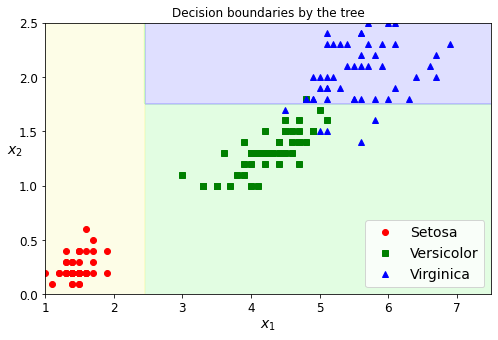

In [6]:
from matplotlib.colors import ListedColormap
def plot_decision_boundary(clf, X, y, axes=[1, 7.5, 0, 2.5], iris=True, legend=False, plot_training=True):
    # Plot samples:
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ro", label="Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "gs", label="Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "b^", label="Virginica")
        plt.axis(axes)
    
    # Plot decision boundaries:
    x1s = np.linspace(axes[0], axes[1], 200)
    x2s = np.linspace(axes[2], axes[3], 200)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#a0faa0','#9898ff'])   # 'r','g','b'
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    
    plt.xlabel(r"$x_1$", fontsize=14)
    plt.ylabel(r"$x_2$", fontsize=14, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)
if let_plot:
    plt.figure(figsize=(8, 5))
    plot_decision_boundary(tree_clf, X, y, legend=True)
    plt.title("Decision boundaries by the tree")
    plt.savefig("figs/decision_tree_decision_boundaries.png")
    plt.show()


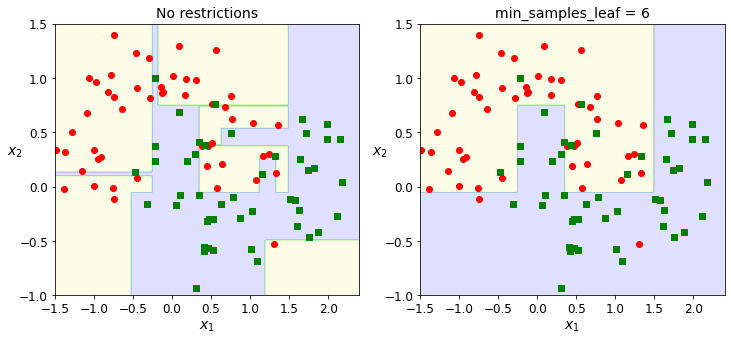

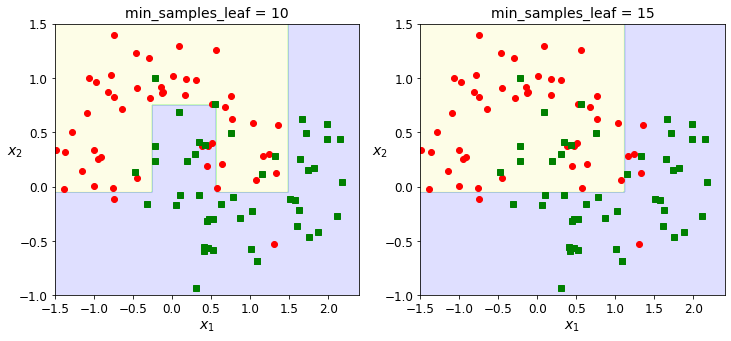

In [47]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.3, random_state=53)

# 2.2. Train trees without and with regularization
deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=6, random_state=42)
#deep_tree_clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
deep_tree_clf2.fit(Xm, ym)
deep_tree_clf3 = DecisionTreeClassifier(min_samples_leaf=10, random_state=42)
deep_tree_clf3.fit(Xm, ym)

deep_tree_clf4 = DecisionTreeClassifier(min_samples_leaf=15, random_state=42)
deep_tree_clf4.fit(Xm, ym)
# 2.3. Plot decision boundaries of trees
if let_plot:
    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
    plt.title("No restrictions", fontsize=14)
    plt.subplot(122)
    plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
    plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
    plt.savefig("figs/min_samples_leaf_plot01")
    plt.show()


    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    plot_decision_boundary(deep_tree_clf3, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
    plt.title("min_samples_leaf = {}".format(deep_tree_clf3.min_samples_leaf), fontsize=14)
    plt.subplot(122)
    plot_decision_boundary(deep_tree_clf4, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
    plt.title("min_samples_leaf = {}".format(deep_tree_clf4.min_samples_leaf), fontsize=14)
    plt.savefig("figs/min_samples_leaf_plot02")
    plt.show()





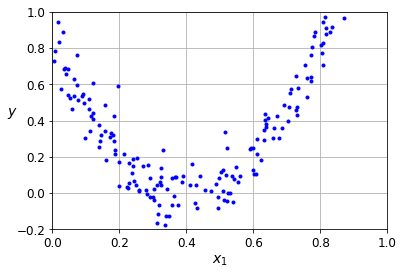

In [53]:
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 5*(X - 0.4)**2
y = y + np.random.randn(m, 1)/10
# Plot samples: 
if let_plot:
    plt.plot(X, y, "b.")
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$y$", fontsize=14, rotation=0)
    plt.grid()
    plt.axis([0, 1, -0.2, 1])
    #plt.savefig("figs/non_linear_data.png")
    plt.show()

In [60]:
# 3.2. Train decision tree regressors
from sklearn.tree import DecisionTreeRegressor
tree_reg1 = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_reg1.fit(X, y)
tree_reg2 = DecisionTreeRegressor(max_depth=7, random_state=42)
tree_reg2.fit(X, y)
tree_reg3 = DecisionTreeRegressor(max_depth=10, random_state=42)
tree_reg3.fit(X, y)

# 3.3. Plot decision trees
export_graphviz(tree_reg1,
        out_file=r"figs/regression_tree1.dot",
        feature_names=["x1"],
        rounded=True, filled=True,
        node_ids=True, precision=3)
Source.from_file(r"figs/regression_tree1.dot").render(r"figs/regression_tree1", format='pdf', view=True, cleanup=True)

export_graphviz(tree_reg2,
        out_file=r"figs/regression_tree2.dot",
        feature_names=["x1"],
        rounded=True, filled=True,
        node_ids=True, precision=3)
Source.from_file(r"figs/regression_tree2.dot").render(r"figs/regression_tree2", format='pdf', view=True, cleanup=True)

export_graphviz(tree_reg3,
        out_file=r"figs/regression_tree3.dot",
        feature_names=["x1"],
        rounded=True, filled=True,
        node_ids=True, precision=3)
Source.from_file(r"figs/regression_tree3.dot").render(r"figs/regression_tree3", format='pdf', view=True, cleanup=True)

'figs\\regression_tree3.pdf'

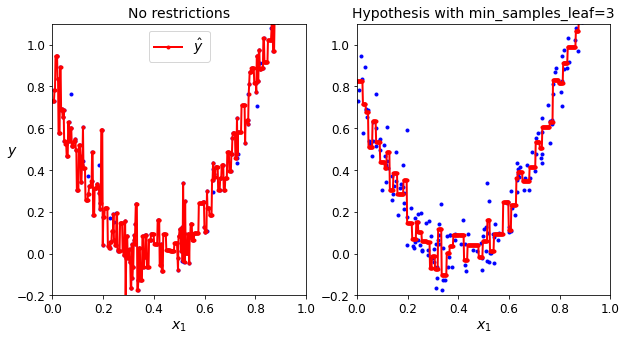

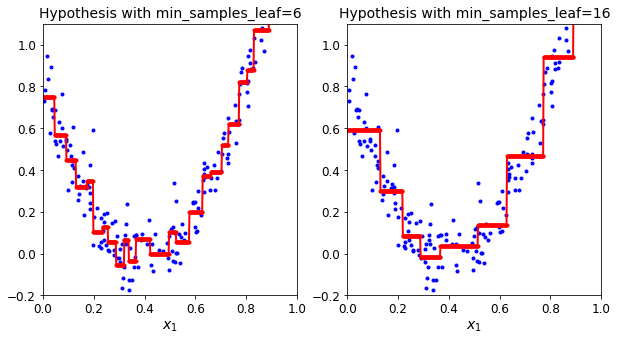

In [68]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg1.fit(X, y)

tree_reg2 = DecisionTreeRegressor(min_samples_leaf=3,random_state=42)
tree_reg2.fit(X, y)

tree_reg3 = DecisionTreeRegressor(min_samples_leaf=6,random_state=42)
tree_reg3.fit(X, y)

tree_reg4 = DecisionTreeRegressor(min_samples_leaf=16,random_state=42)
tree_reg4.fit(X, y)

# Plot hypotheses
if let_plot:
    x1 = np.linspace(0, 1, 500).reshape(-1, 1)
    y_pred1 = tree_reg1.predict(x1)
    y_pred2 = tree_reg2.predict(x1)
    y_pred3 = tree_reg3.predict(x1)
    y_pred4 = tree_reg4.predict(x1)

    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
    plt.axis([0, 1, -0.2, 1.1])
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$y$", fontsize=14, rotation=0)
    plt.legend(loc="upper center", fontsize=14)
    plt.title("No restrictions", fontsize=14)
    plt.subplot(122)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
    plt.axis([0, 1, -0.2, 1.1])
    plt.xlabel("$x_1$", fontsize=14)
    plt.title("Hypothesis with min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)
    plt.savefig("figs/tree_regression_regularization_plot1")
    plt.show()
    
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred3, "r.-", linewidth=2, label=r"$\hat{y}$")
    plt.axis([0, 1, -0.2, 1.1])
    plt.xlabel("$x_1$", fontsize=14)
    plt.title("Hypothesis with min_samples_leaf={}".format(tree_reg3.min_samples_leaf), fontsize=14)
    plt.subplot(122)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred4, "r.-", linewidth=2, label=r"$\hat{y}$")
    plt.axis([0, 1, -0.2, 1.1])
    plt.xlabel("$x_1$", fontsize=14)
    plt.title("Hypothesis with min_samples_leaf={}".format(tree_reg4.min_samples_leaf), fontsize=14)
    plt.savefig("figs/tree_regression_regularization_plot2")
    plt.show()

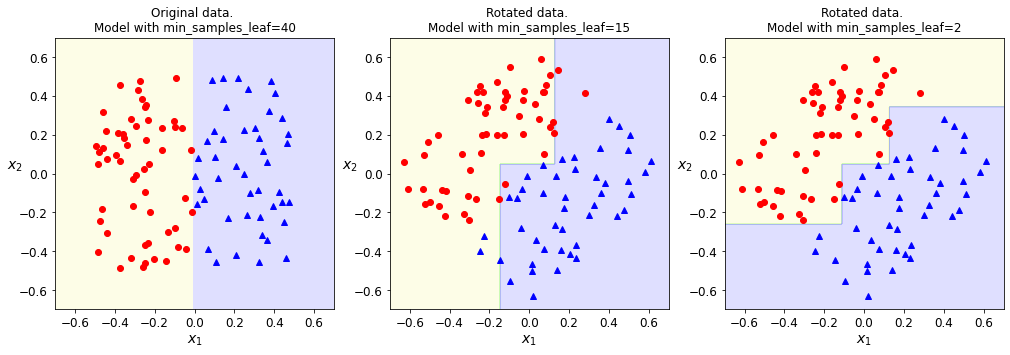

In [77]:
np.random.seed(6)
m = 100
Xs = np.random.rand(m, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2
# Rotate data
angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs .dot (rotation_matrix)

# Train models with original and rotated data
tree_clf_s = DecisionTreeClassifier(min_samples_leaf=40, random_state=42) #min_samples_leaf=1
tree_clf_s.fit(Xs, ys)
tree_clf_sr1 = DecisionTreeClassifier(min_samples_leaf=15, random_state=42)
tree_clf_sr1.fit(Xsr, ys)
tree_clf_sr2 = DecisionTreeClassifier(min_samples_leaf=2, random_state=42)
tree_clf_sr2.fit(Xsr, ys)

# Plot decision boundaries
if let_plot:
    plt.figure(figsize=(17, 5))
    plt.subplot(131)
    plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
    plt.title("Original data. \nModel with min_samples_leaf={}".format(tree_clf_s.min_samples_leaf))
    plt.subplot(132)
    plot_decision_boundary(tree_clf_sr1, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
    plt.title("Rotated data. \nModel with min_samples_leaf={}".format(tree_clf_sr1.min_samples_leaf))
    plt.subplot(133)
    plot_decision_boundary(tree_clf_sr2, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
    plt.title("Rotated data. \nModel with min_samples_leaf={}".format(tree_clf_sr2.min_samples_leaf))
    plt.savefig("figs/sensitivity_to_rotation_plot")
    plt.show()


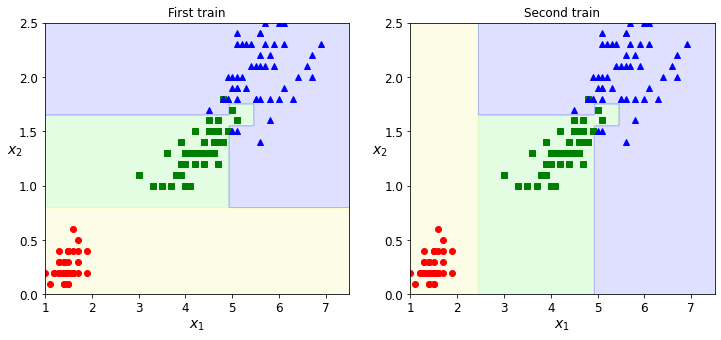

In [78]:
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target # ['SETOSA', 'VERSICOLOR', 'VIRGINICA']

# Train decision trees 2 times (with different random seeds)
tree_clf1 = DecisionTreeClassifier(random_state=40)
tree_clf1.fit(X, y)
tree_clf2 = DecisionTreeClassifier(random_state=41)
tree_clf2.fit(X, y)

# Plot decision trees
if let_plot:
    plt.figure(figsize=[12,5])
    plt.subplot(121)
    plot_decision_boundary(tree_clf1, X, y, legend=False)
    plt.title("First train")
    plt.subplot(122)
    plot_decision_boundary(tree_clf2, X, y, legend=False)
    plt.title("Second train")
    plt.savefig("figs/decision_tree_instability_plot")
    plt.show()


DONE = True




In [92]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
X, y = make_moons(n_samples=10000, noise=0.4, random_state=53)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
dst = DecisionTreeClassifier()
params_grid = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 10, 12, 15], 
               'min_samples_leaf': [4, 5, 6, 7, 9, 12, 15, 20],
               'max_leaf_nodes': [2, 4, 8, 10, 12, 16, 24, 32, 64, 128, 512, 4096]}
grid_search = GridSearchCV(dst, params_grid, cv=5, verbose=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.cv_results_)

y_pred = grid_search.predict(X_test)
print(accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 960 candidates, totalling 4800 fits
{'max_depth': 4, 'max_leaf_nodes': 16, 'min_samples_leaf': 12}
0.8564179104477614
{'mean_fit_time': array([0.00339036, 0.00449114, 0.00379763, 0.00625076, 0.00379996,
       0.00522199, 0.00391784, 0.00389342, 0.00458689, 0.00377331,
       0.00490694, 0.00474167, 0.00511308, 0.00407047, 0.00453386,
       0.00394211, 0.00729198, 0.00437961, 0.00440898, 0.00422425,
       0.00442452, 0.00425863, 0.0043365 , 0.00436239, 0.01911416,
       0.00628767, 0.00398993, 0.01168771, 0.00362573, 0.0051456 ,
       0.01031556, 0.01164289, 0.00406675, 0.0083179 , 0.00473266,
       0.00439425, 0.00550613, 0.00437307, 0.00745649, 0.00496788,
       0.00416565, 0.00402317, 0.0047492 , 0.00442595, 0.00480537,
       0.00592656, 0.00393276, 0.01589866, 0.01121492, 0.00616393,
       0.00572796, 0.00628963, 0.00562077, 0.00455885, 0.00459237,
       0.00527811, 0.00966935, 0.00444088, 0.00529175, 0.00527415,
       0.00603795, 0.00477853, 0